# Homework 11.3: Quantum Phase Estimation

Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms. The objective of the algorithm is the following:

Given a unitary operator $U$, the algorithm estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$. Here $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue. Since $U$ is unitary, all of its eigenvalues have a norm of 1.

In [1]:
### START DO NOT CHANGE ###
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import os.path
import matplotlib.pyplot as plt
import math



token_file = 'token.txt'
assert os.path.exists(token_file)

# Common variables
nqubits = 3
shots = 2048
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits 
    # NOTE: we reduced n by one earlier in the function
    qft_rotations(circuit, n)

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit.decompose() # .decompose() allows us to see the individual gates

def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

def load_IBMQ():
    with open(token_file) as f:
        token = f.read()
        IBMQ.save_account(token)
    IBMQ.load_account()

    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
    
    return provider, backend


def simulate(circuit):
    qc = circuit.copy()
    #qobj = assemble(qc, shots=shots)
    job = sim.run(qc)
    job_monitor(job)
    return job.result().get_counts()


def run_job(circuit):
    qc = circuit.copy()
    transpiled_qc = transpile(qc, backend, optimization_level=3)
    job = backend.run(transpiled_qc, shots=shots)
    job_monitor(job)

    return job.result().get_counts()

provider, backend = load_IBMQ()
sim = Aer.get_backend("aer_simulator")

### END DO NOT CHANGE ###

/tmp/ipykernel_171/2399753534.py:68: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(token)
configrc.store_credentials:WARNING:2024-04-23 18:08:32,654: Credentials already present. Set overwrite=True to overwrite.


As an example, we will run QPE on the $T$-gate to estimate its phase. The $T$-gate is given by

\begin{align}
T = \begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}
\end{align}

Running QPE on $T$ will give us $\theta$ where:



$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$



We expect to find:



$$\theta = \frac{1}{8}$$

# The Problem <a id='the_problem'></a>

In this notebook, you will estimate the phase of the rotation gate $$S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{8 \pi i}{5}} \end{bmatrix}$$ using 3 and 5 counting qubits.

### (a) What are the eigenstates and eigenvalues of this operator? What is the phase $\theta$?

$$ S|1\rangle = e^{2i\pi\theta}|1\rangle $$


$$\theta = \frac{4}{5}$$

Moving forward, we let $| \psi \rangle$ be the eigenstate of $S$ that is not equal to $| 0 \rangle$.

# Three Counting Qubits

We will first estimate the phase $\theta$ using 3 qubits. 

### (b) How many qubits total do we need for this process?

Three counting qubits and one qubits in the state $| \psi \rangle$. FOUR TOTAL

### (c)(i) State preparation: We provide a circuit that has the amount of qubits from answer (b). Your job is to prepare the eigenstate $| \psi \rangle$ on the last qubit.

In [2]:
### BEGIN DO NOT CHANGE ###
qpe = QuantumCircuit(4,3)
### END DO NOT CHANGE ###

### BEGIN YOUR CODE ###

qpe.x(3)

### BEGIN YOUR CODE ###

### (c)(ii) Apply $H$-gates to all the counting qubits

In [2]:
### BEGIN YOUR CODE ###

for qubit in range(3):
    qpe.h(qubit)

### BEGIN YOUR CODE ###

0
1
2


### (d) Now we need to add the controlled U operations. Most of the logic is in the provided method `controlled_U`, your task is to call this function with the correct angle.

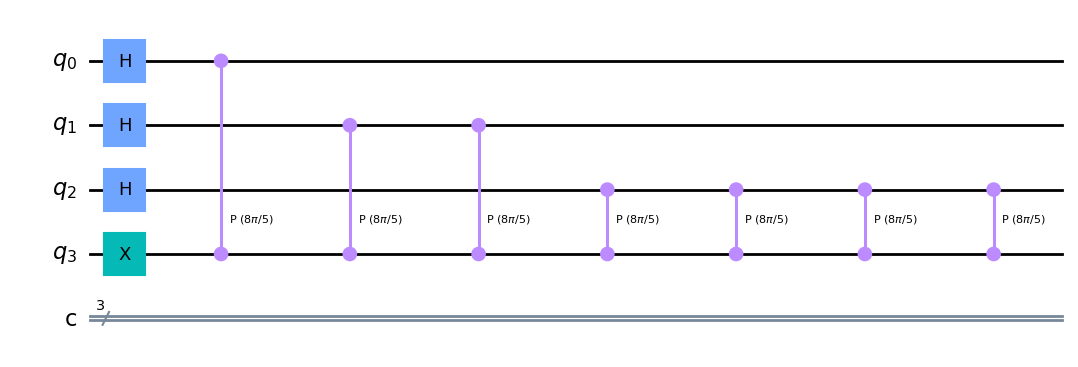

In [4]:
### BEGIN DO NOT CHANGE ###
def controlled_U(circuit, angle, num_counting_qubits):
    repetitions = 1
    for counting_qubit in range(num_counting_qubits):
        for i in range(repetitions):
            circuit.cp(angle, counting_qubit, num_counting_qubits);
        repetitions *= 2
    
    return circuit
### END DO NOT CHANGE ###

### BEGIN YOUR CODE ###

controlled_U(qpe, (8*pi/5), 3)

### END YOUR CODE ###

qpe.draw('mpl')

### (e) Lastly, add the inverse QFT to the appropriate qubits using the `qft_dagger` method

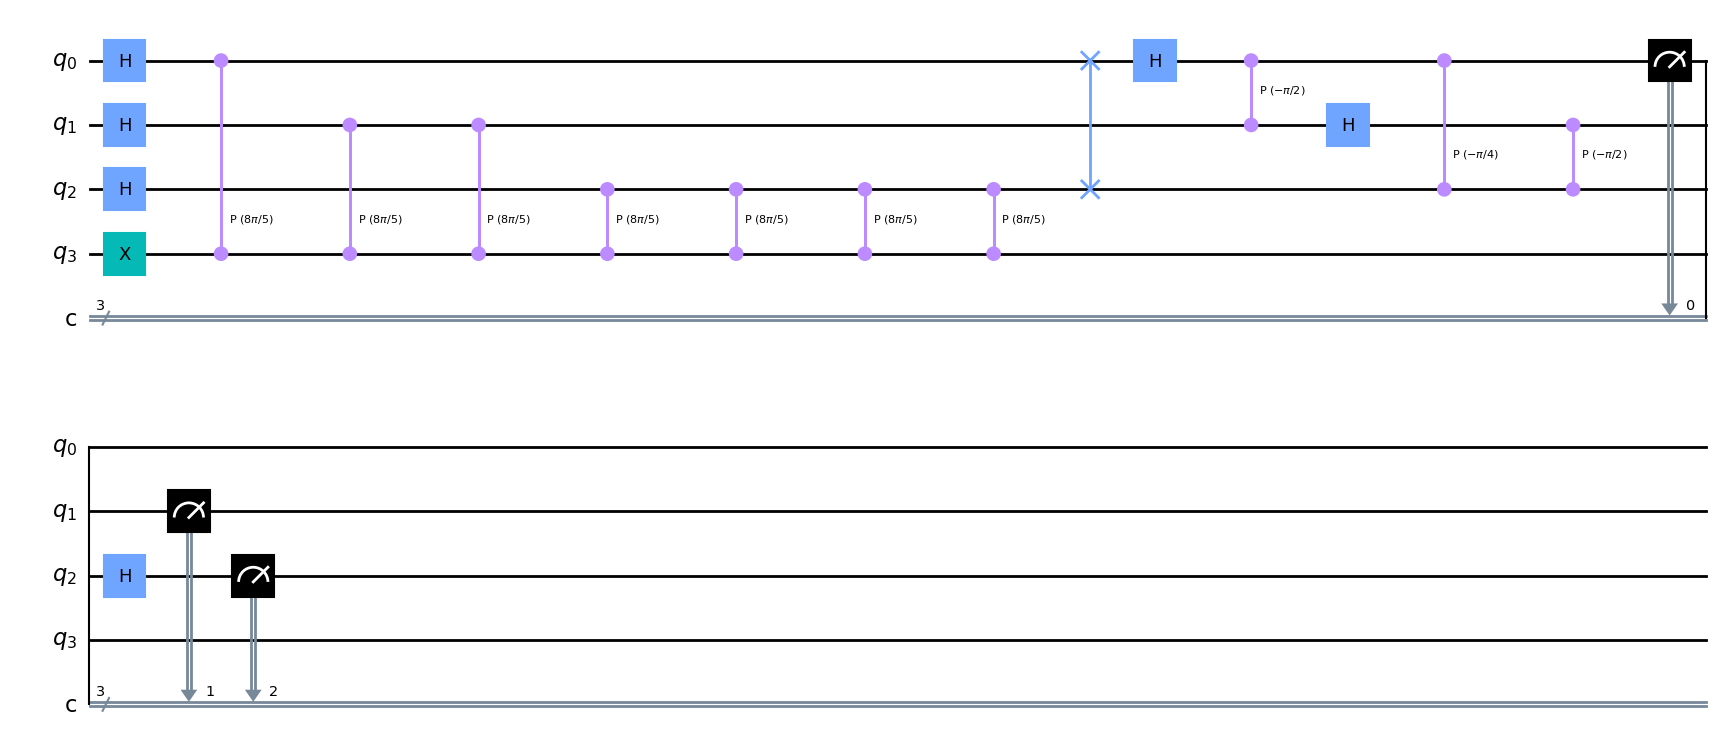

In [5]:
### BEGIN YOUR CODE ###

qft_dagger(qpe, 3)

### BEGIN YOUR CODE ###


### BEGIN DO NO CHANGE ###
for n in range(3):
    qpe.measure(n,n)
qpe.draw('mpl')
### END DO NO CHANGE ###

In [6]:
### BEGIN DO NO CHANGE ###
counts_simulated = simulate(qpe)
counts_real = run_job(qpe)
### END DO NO CHANGE ###

/tmp/ipykernel_171/2399753534.py:82: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = sim.run(qobj)


Job Status: job has successfully run
Job Status: job has successfully run


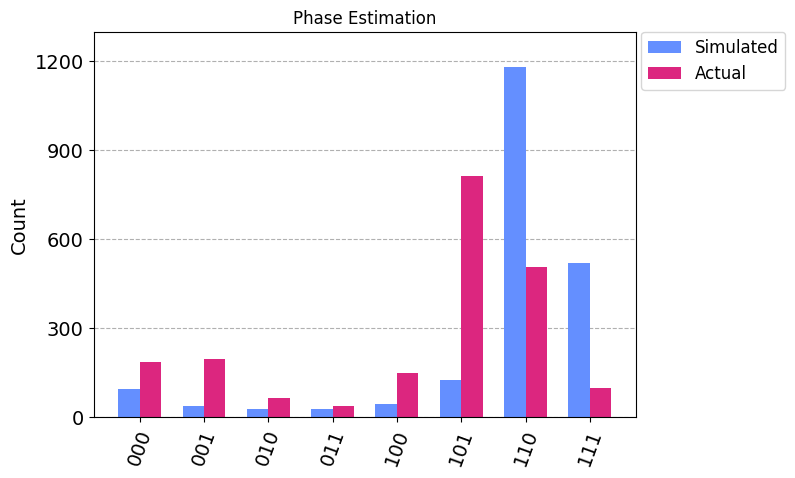

In [7]:
### BEGIN DO NO CHANGE ###
legend = ['Simulated', 'Actual']
plot_histogram([counts_simulated, counts_real], legend=legend, bar_labels=False, title='Phase Estimation')
### END DO NO CHANGE ###

If $x_1x_2x_3$ is a bitstring that occurs with high probability and $x$ is its decimal representation, then we expect that $\theta \approx x / 2^3$. (The 3 corresponds to the 3 counting qubits) 

### (f) Interpret your results: which bitstring(s) have the highest probability? How does this correspond to the real $\theta$?

The bit strings with the highest probability are 110 and 111, compared to the real $\theta$

We will now repeat steps (b)-(f) from above using five counting qubits instead of three.

## Five Counting Qubits

To get more precision we simply add more counting qubits. We are going to add two more counting qubits for 5 total.

### (g) How many qubits total do we need for this process?

Five counting qubits and one qubits in the state $| \psi \rangle$. SIX TOTAL

### (h)(i) State preparation: We construct a circuit that has the amount of qubits from answer (g). Your job is to prepare the eigenstate $| \psi \rangle$ on the last qubit.

In [8]:
### BEGIN DO NOT CHANGE ###
qpe5 = QuantumCircuit(6,5)
### END DO NOT CHANGE ###

### BEGIN YOUR CODE ###

qpe5.x(5)

### END YOUR CODE ###

### (h)(ii) Apply $H$-gates to all the counting qubits

In [9]:
### BEGIN YOUR CODE ###

for qubit in range(5):
    qpe5.h(qubit)

### END YOUR CODE ###

### (i) Add the controlled-U gates

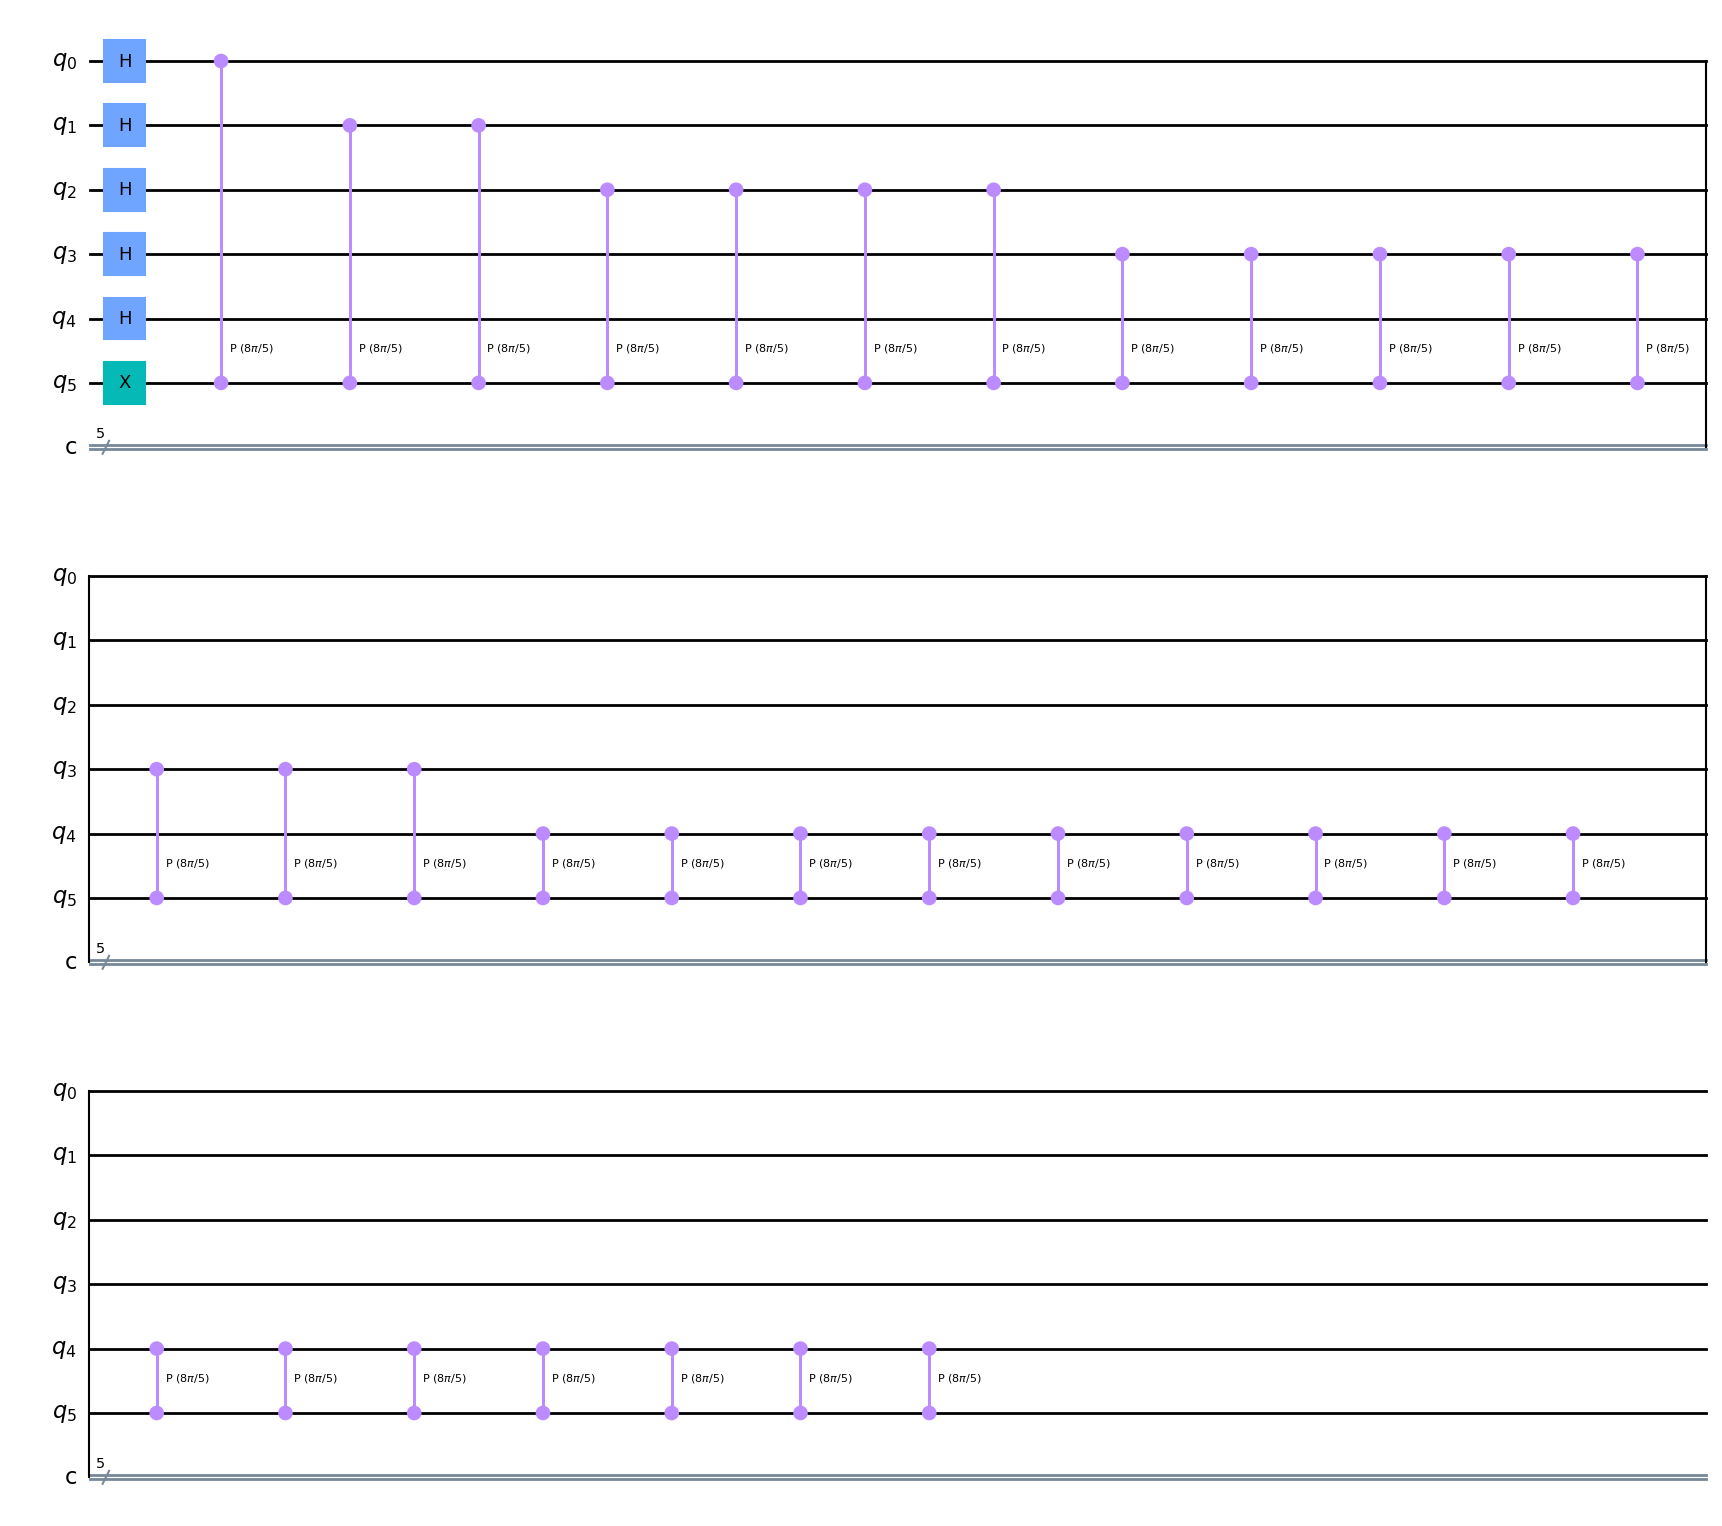

In [10]:
### BEGIN YOUR CODE ###

controlled_U(qpe5, (8*pi/5), 5)

### END YOUR CODE ###

qpe5.draw('mpl')

### (j) Lastly, add the inverse QFT to the appropriate qubits using the `qft_dagger` method

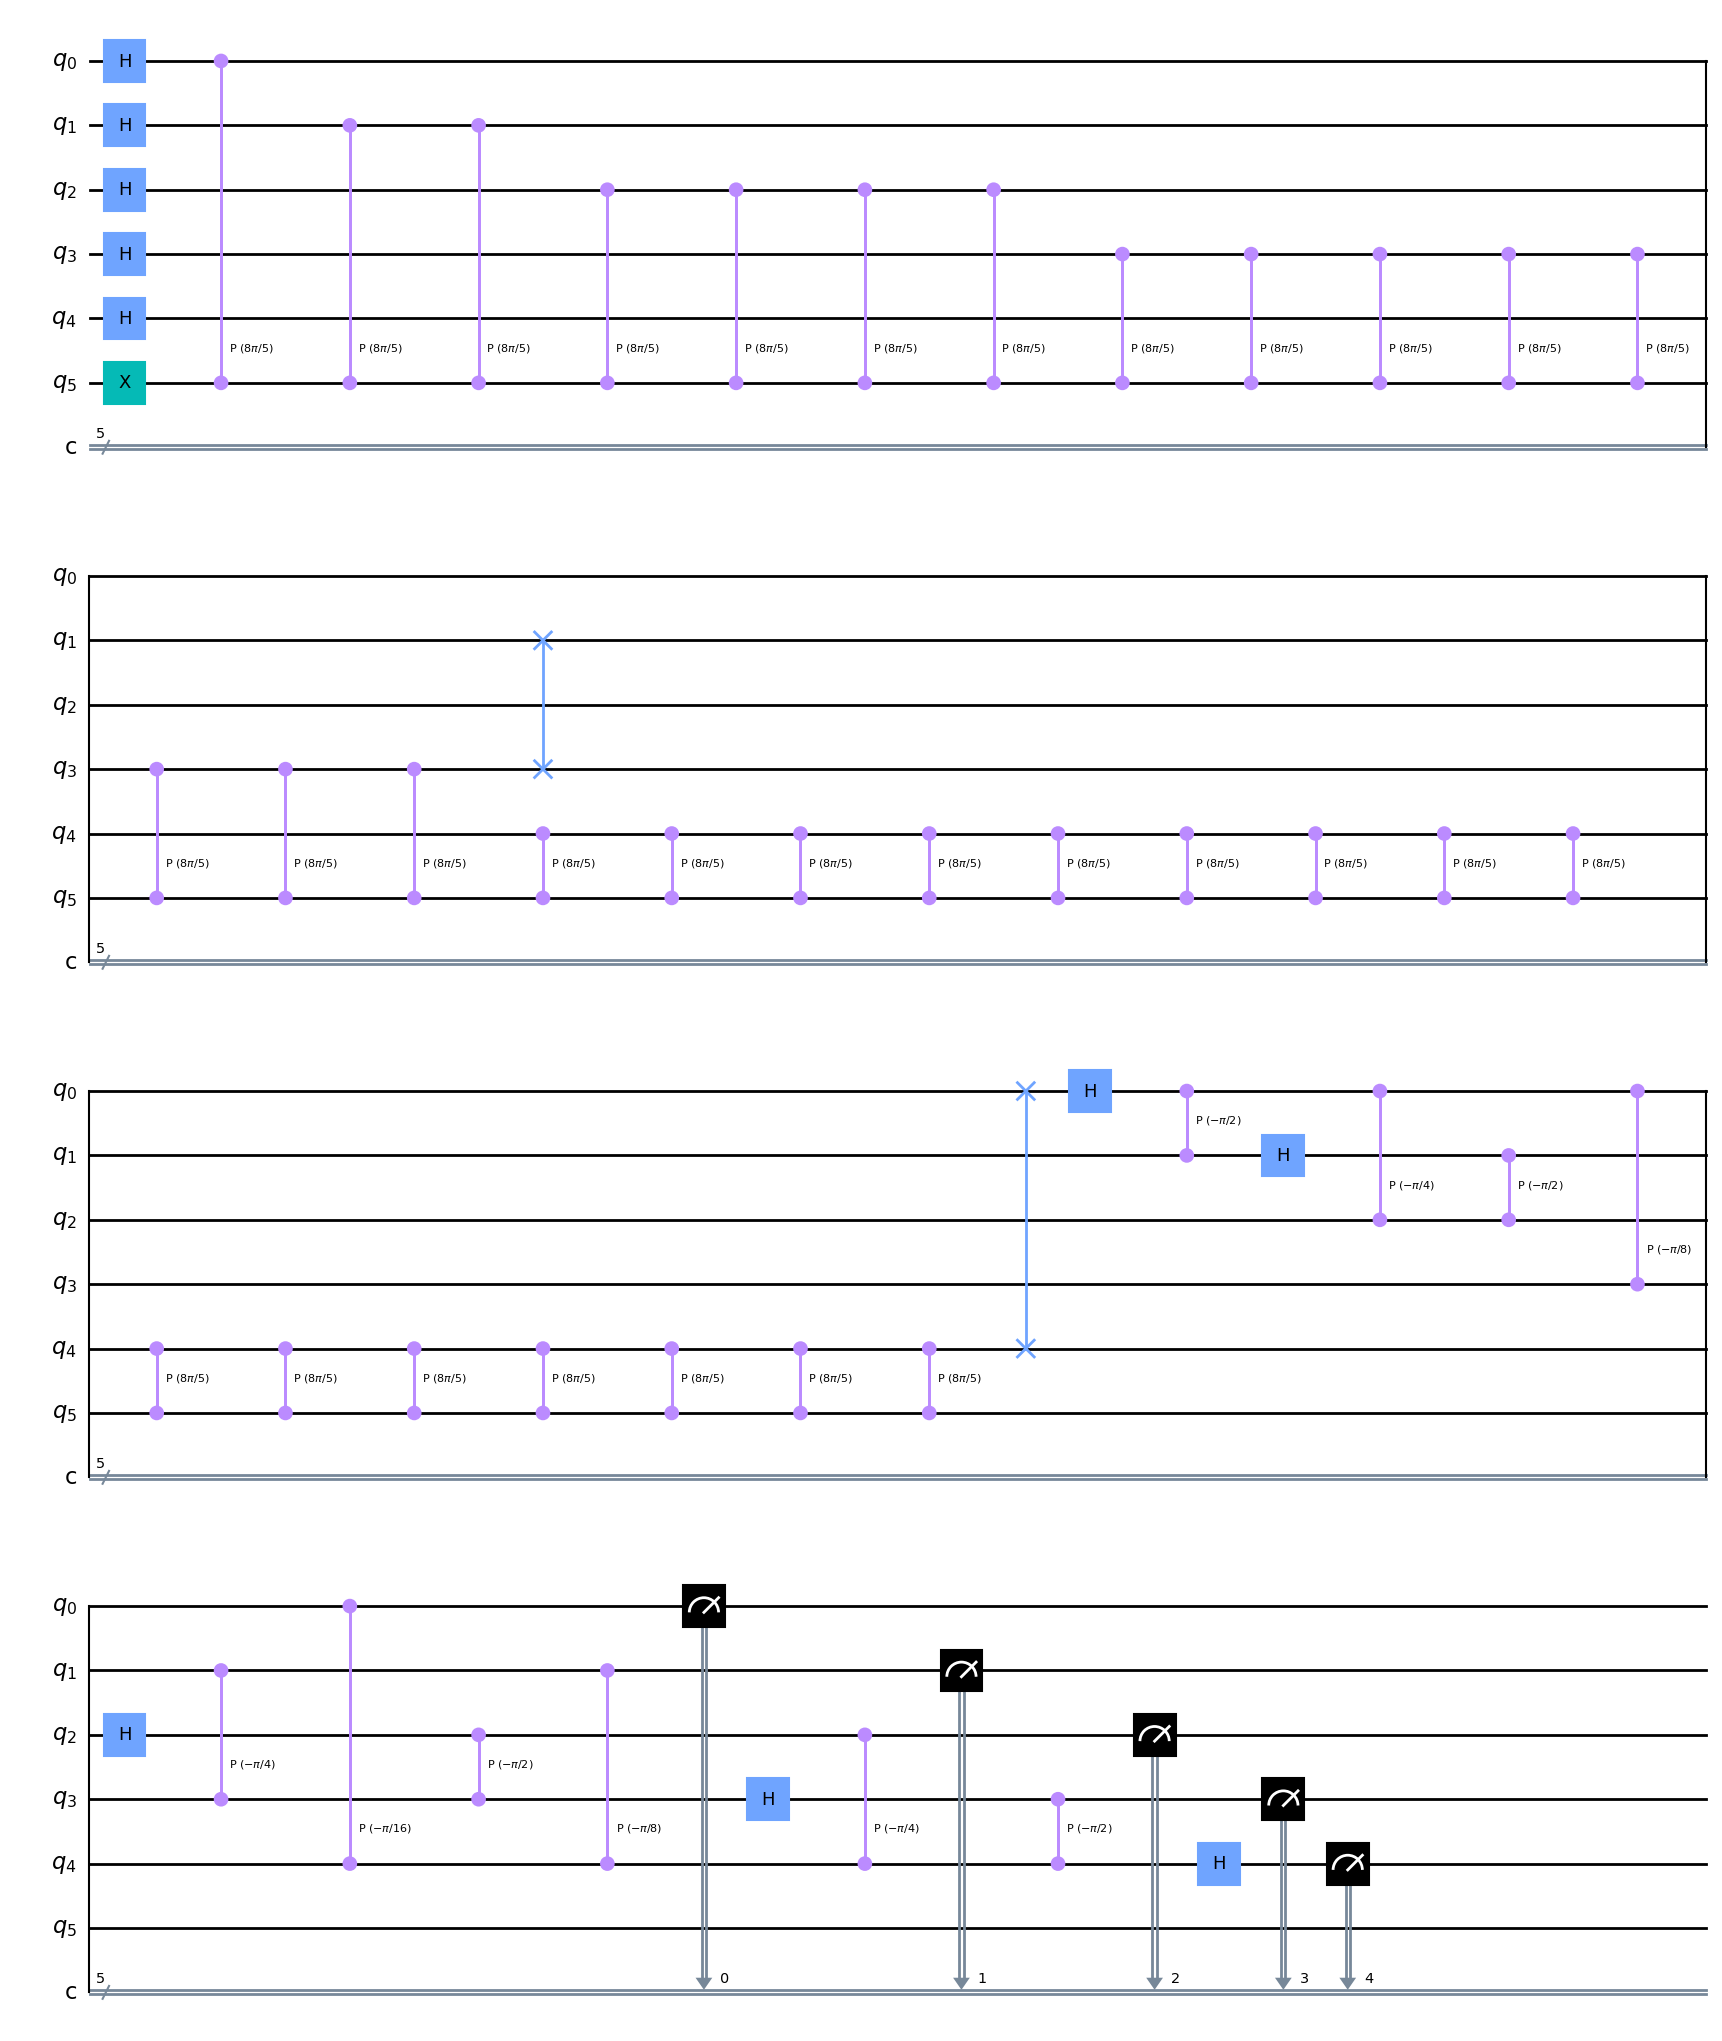

In [11]:
### BEGIN YOUR CODE ###

qft_dagger(qpe5, 5)

### END YOUR CODE ###

### BEGIN DO NO TOUCH ###
for n in range(5):
    qpe5.measure(n,n)
qpe5.draw('mpl')
### END DO NO TOUCH ###

In [12]:
### BEGIN YOUR CODE ###
counts_simulated = simulate(qpe5)
### END YOUR CODE ###

/tmp/ipykernel_171/2399753534.py:82: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = sim.run(qobj)


Job Status: job has successfully run


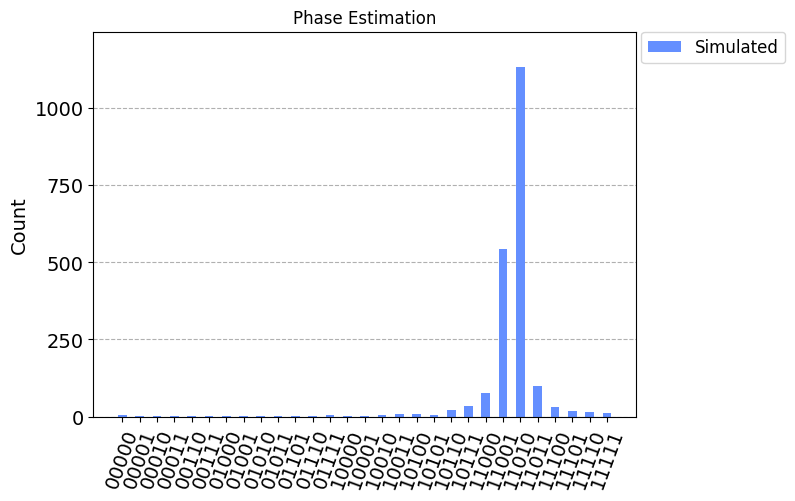

In [13]:
### BEGIN YOUR CODE ###
legend = ['Simulated']
plot_histogram([counts_simulated], legend=legend, bar_labels=False, title='Phase Estimation')
### END YOUR CODE ###

### (k) Once again, interpret your results. How do these approximations compare to those in the 3-qubit case?

The simulation with 5 counting qubits 

## References <a id='references'></a>

[1] Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information: 10th Anniversary Edition (10th ed.). Cambridge University Press, New York, NY, USA. 

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table